In [12]:
import azureml.core
import pandas as pd
from azureml.core.workspace import Workspace
import logging
import os

In [13]:
from azureml.core import Workspace
ws = Workspace.from_config()
experiment_name = '1023automated-ml-regression'
# project folder
project_folder = '.'

In [14]:
output = {}
output['SDK version'] = azureml.core.VERSION
output['Subscription ID'] = ws.subscription_id
output['Workspace'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Project Directory'] = project_folder
pd.set_option('display.max_colwidth', -1)
outputDf = pd.DataFrame(data = output, index = [''])
outputDf.T

,
SDK version,1.0.48
Subscription ID,c054f650-e599-460d-a1ef-eb3941084791
Workspace,ukb_analysis1023_v2
Resource Group,docs-aml
Location,eastus2
Project Directory,.


In [15]:
#import azureml.dataprep as dprep
import pandas as pd
df_dropped = pd.read_pickle("/Users/jilanxin/Documents/Biobank/my_Azure_ML/UKB_data")
df_dropped.shape

(4624, 339)

In [5]:
df_dropped.to_csv("/Users/jilanxin/Documents/Biobank/my_Azure_ML_1910/old_Data_withICA.csv", index=False)

In [16]:
y_df = df_dropped['n_21003_0_0']
X_df = df_dropped.drop(['n_21003_0_0'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=223)
# flatten y_train to 1d array
y_train.values.flatten()

array([58, 53, 53, ..., 61, 54, 53])

In [18]:
x_train.columns

Index(['n_25001_2_0', 'n_25002_2_0', 'n_25011_2_0', 'n_25012_2_0',
       'n_25013_2_0', 'n_25014_2_0', 'n_25015_2_0', 'n_25016_2_0',
       'n_25017_2_0', 'n_25018_2_0',
       ...
       'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55'],
      dtype='object', length=338)

In [19]:
from azureml.train.automl import AutoMLConfig

In [20]:
automl_settings = {
    "iteration_timeout_minutes" : 30,
    "iterations" : 30,
    "primary_metric" : 'spearman_correlation',
    "preprocess" : True,
    "verbosity" : logging.INFO,
    "n_cross_validations": 5
}
# local compute 
automated_ml_config = AutoMLConfig(task = 'regression',
                             debug_log = 'automated_ml_errors.log',
                             path = project_folder,
                             X = x_train.values,
                             y = y_train.values.flatten(),
                                   model_explainability=True,
                             **automl_settings)

In [21]:
from azureml.core.experiment import Experiment
experiment=Experiment(ws, experiment_name)
local_run = experiment.submit(automated_ml_config, show_output=True)

Running on local machine
Parent Run ID: AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6
Current status: DatasetFeaturization. Beginning to featurize the dataset.
Current status: DatasetEvaluation. Gathering dataset statistics.
Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturizationCompleted. Completed featurizing the dataset.
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.
Current status: ModelSelection. Beginning model selection.

****************************************************************************************************
ITERATION: The iteration being evaluated.
PIPELINE: A summary description of the pipeline being evaluated.
DURATION: Time taken for the current iteration.
METRIC: The result of computing score on the fitted pipeline.
BEST: The best observed score thus far.
****************************************************************************************************

 ITERATION 

WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(54, 'ECONNRESET')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_0/explanation/a77ef83f-0688-48cf-ba00-d3febb4d2806/features.json?sv=2018-11-09&sr=b&sig=8lMkbell7f1geTTT417sEDv8I48h6gxB2269zlWuz6g%3D&st=2019-10-23T07%3A13%3A10Z&se=2019-10-24T07%3A23%3A10Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQSUzRA%3D%3D
WARNING - Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1284f80f0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',)': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_0/explanation/a77ef83f-0688-48cf-ba00-d3febb4d2806/features.json?sv=2018-11-09&

StandardScalerWrapper RandomForest             0:18:09       0.6862    0.6862
         1   ts None
ts None
ts None
ts 300
MinMaxScaler RandomForest                      0:08:16       0.7097    0.7097
         2   ts None
ts None
ts 300


WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(32, 'EPIPE')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_2/explanation/46d35d5d-c6c1-4c2f-825b-e6f33f9ea464/local_importance_values.json?sv=2018-11-09&sr=b&sig=jMzEOJ%2F6QJyBwBFMv9fjRYujPt0MDojYOLacNXWgJMc%3D&st=2019-10-23T07%3A39%3A06Z&se=2019-10-24T07%3A49%3A06Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNVFkzTnpjeU1UWSUzRA%3D%3D
WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(32, 'EPIPE')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_2/explanation/46d35d5d-c6c1-4c2f-825b-e6f33f9ea464/local_importance_values.json?sv=2018-11-09&sr=b&sig=jMzEOJ%2F6QJyBwBFMv9fjRYujPt0MDojYOLacNXWgJMc%3D&st=2019-10-23T07%3A39%3A06Z&se=2019

StandardScalerWrapper ExtremeRandomTrees       0:19:31       0.6907    0.7097
         3   ts None
ts None
ts 300


WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(54, 'ECONNRESET')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_3/explanation/a9524f32-07b0-4e0e-8da9-80eb255876bd/features.json?sv=2018-11-09&sr=b&sig=wCrR0sFumaCuv60ZjAkaB2mzI28ANAvwo7bB8k37WSw%3D&st=2019-10-23T07%3A58%3A56Z&se=2019-10-24T08%3A08%3A56Z&sp=rcw&comp=blocklist


StandardScalerWrapper LightGBM                 0:12:10       0.7016    0.7097
         4   ts None
ts None
ts None
ts 300
RobustScaler DecisionTree                      0:05:54       0.5360    0.7097
         5   ts None
ts None
ts None
ts 300
StandardScalerWrapper LassoLars                0:04:15       0.7919    0.7919
         6   ts None
ts None
ts None
ts 300
StandardScalerWrapper LightGBM                 0:02:46       0.7322    0.7919
         7   ts None
ts None
ts 300
StandardScalerWrapper RandomForest             0:04:40       0.6970    0.7919
         8   

WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(32, 'EPIPE')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_8/outputs/model.pkl?sv=2018-11-09&sr=b&sig=%2B8lxqDutrngcdOd%2FB9v3aburKEqte5a7E%2BLy7%2FGe7Tk%3D&st=2019-10-23T08%3A27%3A33Z&se=2019-10-24T08%3A37%3A33Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQSUzRA%3D%3D


ts None
ts None
ts None
ts 300


WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(32, 'EPIPE')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_8/explanation/8a4b6640-97ea-4f0d-876f-386fc267978c/local_importance_values.json?sv=2018-11-09&sr=b&sig=dmX7Oks9%2F9ie1lAApdEwQ9RZwzqwPsc9HulIqvO5DRI%3D&st=2019-10-23T08%3A30%3A48Z&se=2019-10-24T08%3A40%3A48Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNVFkzTnpjeU1UWSUzRA%3D%3D
WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(32, 'EPIPE')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_8/explanation/8a4b6640-97ea-4f0d-876f-386fc267978c/local_importance_values.json?sv=2018-11-09&sr=b&sig=dmX7Oks9%2F9ie1lAApdEwQ9RZwzqwPsc9HulIqvO5DRI%3D&st=2019-10-23T08%3A30%3A48Z&se=2019

StandardScalerWrapper LassoLars                0:09:11       0.7883    0.7919
         9   ts None
ts None
ts None
ts 300


WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', timeout())': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_9/explanation/0919499b-ecb8-4dfa-9948-d8b96585877b/local_importance_values.json?sv=2018-11-09&sr=b&sig=yygIP1PtBze4c5fb3kBimxxDruccCpnT9ImJRrQEOO8%3D&st=2019-10-23T08%3A38%3A14Z&se=2019-10-24T08%3A48%3A14Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNRFF4T1RRek1EUSUzRA%3D%3D
WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(32, 'EPIPE')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_9/explanation/0919499b-ecb8-4dfa-9948-d8b96585877b/local_importance_values.json?sv=2018-11-09&sr=b&sig=yygIP1PtBze4c5fb3kBimxxDruccCpnT9ImJRrQEOO8%3D&st=2019-10-23T08%3A38%3A14Z&se=2019-10-24T08%3A48%3A14Z

MinMaxScaler ExtremeRandomTrees                0:05:25       0.7064    0.7919
        10   ts None
ts None
ts None
ts 300
RobustScaler ExtremeRandomTrees                0:02:49       0.7162    0.7919
        11   ts None
ts None
ts None
ts 300
StandardScalerWrapper ExtremeRandomTrees       0:02:10       0.6993    0.7919
        12   ts None
ts None
ts 300


WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', timeout())': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_12/explanation/43c9abd1-0079-48bf-a426-8d6f908ef2d0/local_importance_values.json?sv=2018-11-09&sr=b&sig=pIhgPasQb1SaEGpusjX5znqrXc9mebmiE8sgIlAHzFY%3D&st=2019-10-23T08%3A47%3A50Z&se=2019-10-24T08%3A57%3A50Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNRFF4T1RRek1EUSUzRA%3D%3D


MinMaxScaler ExtremeRandomTrees                0:02:22       0.6999    0.7919
        13   ts None
ts None
ts None
ts None
ts 300


WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', timeout())': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_13/explanation/2f57478f-95c2-4394-9faa-e8b0c8e6a4bc/local_importance_values.json?sv=2018-11-09&sr=b&sig=L75YWqxKMjwtIgARVVJjlCXZsj7GRnYP%2Fuvy9WMit30%3D&st=2019-10-23T08%3A50%3A16Z&se=2019-10-24T09%3A00%3A16Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNRFF4T1RRek1EUSUzRA%3D%3D
WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(32, 'EPIPE')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_13/explanation/2f57478f-95c2-4394-9faa-e8b0c8e6a4bc/local_importance_values.json?sv=2018-11-09&sr=b&sig=L75YWqxKMjwtIgARVVJjlCXZsj7GRnYP%2Fuvy9WMit30%3D&st=2019-10-23T08%3A50%3A16Z&se=2019-10-24T09%3A00

RobustScaler RandomForest                      0:03:46       0.7084    0.7919
        14   

WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(32, 'EPIPE')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_14/outputs/model.pkl?sv=2018-11-09&sr=b&sig=41OHJOS53fz5DZihrpX9hSIQahqjE2yMZnu%2FMkh5ilk%3D&st=2019-10-23T08%3A53%3A31Z&se=2019-10-24T09%3A03%3A31Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQSUzRA%3D%3D


ts None
ts None
ts None
ts 300
StandardScalerWrapper LassoLars                0:04:00       0.7178    0.7919
        15   

WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(32, 'EPIPE')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_15/outputs/internal_cross_validated_models.pkl?sv=2018-11-09&sr=b&sig=7tsr7WjuExn1Gh4iyixab6FseecYj%2BLOt5%2BW5g%2F0wj8%3D&st=2019-10-23T08%3A57%3A21Z&se=2019-10-24T09%3A07%3A21Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQSUzRA%3D%3D


ts None
ts None
ts None
ts 300


WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(32, 'EPIPE')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_15/explanation/7c610caf-a638-453c-be89-25fb0455065f/local_importance_values.json?sv=2018-11-09&sr=b&sig=a0xTPrRE3xd8pKx%2BCCBzF4im5CfDsiOsH00OvYRUfiY%3D&st=2019-10-23T08%3A59%3A00Z&se=2019-10-24T09%3A09%3A00Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQSUzRA%3D%3D


StandardScalerWrapper ExtremeRandomTrees       0:04:29       0.6720    0.7919
        16   ts None
ts None
ts None
ts 300


WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(32, 'EPIPE')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_16/explanation/23c52414-f646-43c2-b08f-14eaf14df7af/local_importance_values.json?sv=2018-11-09&sr=b&sig=FOrjhIZW3VfK33YL81eAuKCUABDa7SWIPbCgvPSaHs8%3D&st=2019-10-23T09%3A02%3A28Z&se=2019-10-24T09%3A12%3A28Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNVEkxT0RJNU1USSUzRA%3D%3D


StandardScalerWrapper RandomForest             0:04:16       0.6794    0.7919
        17   ts None
ts None
ts None
ts 300
MinMaxScaler SGD                               0:03:07       0.7861    0.7919
        18   ts None
ts None
ts None
ts 300
StandardScalerWrapper RandomForest             0:01:50       0.7002    0.7919
        19   ts None
ts None
ts None
ts 300
MinMaxScaler RandomForest                      0:01:54       0.6624    0.7919
        20   ts None
ts None
ts None
ts 300
RobustScaler LassoLars                         0:02:04       0.7790    0.7919
        21   ts None
ts None
ts None
ts 300


WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', timeout())': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_21/explanation/0e847cc2-f330-473c-9332-9defd68facb3/local_importance_values.json?sv=2018-11-09&sr=b&sig=KjCL%2FtHOPeQDDTnxYGJtRduITXY1e5cvPrA5Ix2vsL8%3D&st=2019-10-23T09%3A17%3A37Z&se=2019-10-24T09%3A27%3A37Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNRFF4T1RRek1EUSUzRA%3D%3D


RobustScaler DecisionTree                      0:04:11       0.6018    0.7919
        22   ts None
ts None
ts None
ts 300


WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(60, 'ETIMEDOUT')",))': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_22/explanation/e1d6855e-1ff4-4e1a-b608-507f232f05eb/features.json?sv=2018-11-09&sr=b&sig=3eRmO8dxv910BCZARhLfJMcDEym5V9ADXfZk4G6O6%2FU%3D&st=2019-10-23T09%3A20%3A05Z&se=2019-10-24T09%3A30%3A05Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQSUzRA%3D%3D
WARNING - Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x12b144ac8>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',)': /azureml/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_22/explanation/e1d6855e-1ff4-4e1a-b608-507f232f05eb/features.json?sv=2018-11-

MaxAbsScaler LightGBM                          1:26:37       0.7572    0.7919
        23   ts None
ts None
ts None
ts 300
MinMaxScaler DecisionTree                      0:01:59       0.5293    0.7919
        24   

WARNING - Retrying (Retry(total=2, connect=3, read=3, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', timeout('select timed out',))': /artifact/v2.0/subscriptions/c054f650-e599-460d-a1ef-eb3941084791/resourceGroups/docs-aml/providers/Microsoft.MachineLearningServices/workspaces/ukb_analysis1023_v2/artifacts/batch/metadata/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_24
WARNING - Retrying (Retry(total=1, connect=3, read=3, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', timeout('select timed out',))': /artifact/v2.0/subscriptions/c054f650-e599-460d-a1ef-eb3941084791/resourceGroups/docs-aml/providers/Microsoft.MachineLearningServices/workspaces/ukb_analysis1023_v2/artifacts/batch/metadata/ExperimentRun/dcid.AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_24
WARNING - Retrying (Retry(total=0, connect=3, read=3, redirect=None, status=None)) after connection broken by 'ProxyError('C

ts 300


WARNING - Retrying (Retry(total=2, connect=3, read=3, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', timeout('select timed out',))': /history/v1.0/subscriptions/c054f650-e599-460d-a1ef-eb3941084791/resourceGroups/docs-aml/providers/Microsoft.MachineLearningServices/workspaces/ukb_analysis1023_v2/experiments/1023automated-ml-regression/runs/AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_24/events
WARNING - Retrying (Retry(total=1, connect=3, read=3, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', timeout('select timed out',))': /history/v1.0/subscriptions/c054f650-e599-460d-a1ef-eb3941084791/resourceGroups/docs-aml/providers/Microsoft.MachineLearningServices/workspaces/ukb_analysis1023_v2/experiments/1023automated-ml-regression/runs/AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_24/events
WARNING - Retrying (Retry(total=0, connect=3, read=3, redirect=None, status=None)) after connection broken by 

                                               0:33:18          nan    0.7919
ERROR: Run AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_24 failed with exception "Error occurred in request., ProxyError: HTTPSConnectionPool(host='eastus2.experiments.azureml.net', port=443): Max retries exceeded with url: /history/v1.0/subscriptions/c054f650-e599-460d-a1ef-eb3941084791/resourceGroups/docs-aml/providers/Microsoft.MachineLearningServices/workspaces/ukb_analysis1023_v2/experiments/1023automated-ml-regression/runs/AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6_24 (Caused by ProxyError('Cannot connect to proxy.', timeout('select timed out',)))".


WARNING - Retrying (Retry(total=2, connect=3, read=3, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', timeout('select timed out',))': /jasmine/v1.0/subscriptions/c054f650-e599-460d-a1ef-eb3941084791/resourceGroups/docs-aml/providers/Microsoft.MachineLearningServices/workspaces/ukb_analysis1023_v2/experiment/1023automated-ml-regression/runs/AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6/next
WARNING - Retrying (Retry(total=1, connect=3, read=3, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', timeout('select timed out',))': /jasmine/v1.0/subscriptions/c054f650-e599-460d-a1ef-eb3941084791/resourceGroups/docs-aml/providers/Microsoft.MachineLearningServices/workspaces/ukb_analysis1023_v2/experiment/1023automated-ml-regression/runs/AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6/next
WARNING - Retrying (Retry(total=0, connect=3, read=3, redirect=None, status=None)) after connection broken by 'ProxyError(

ts 300


WARNING - Retrying (Retry(total=2, connect=3, read=3, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', timeout('select timed out',))': /history/v1.0/subscriptions/c054f650-e599-460d-a1ef-eb3941084791/resourceGroups/docs-aml/providers/Microsoft.MachineLearningServices/workspaces/ukb_analysis1023_v2/experiments/1023automated-ml-regression/runs/AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6/events
WARNING - Retrying (Retry(total=1, connect=3, read=3, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', timeout('select timed out',))': /history/v1.0/subscriptions/c054f650-e599-460d-a1ef-eb3941084791/resourceGroups/docs-aml/providers/Microsoft.MachineLearningServices/workspaces/ukb_analysis1023_v2/experiments/1023automated-ml-regression/runs/AutoML_664cb5b0-72a8-4822-b10f-c89ac2b32ed6/events
WARNING - Retrying (Retry(total=0, connect=3, read=3, redirect=None, status=None)) after connection broken by 'Proxy

ClientException: Error occurred when trying to set parent run status.

In [26]:
from azureml.widgets import RunDetails
RunDetails(local_run).show()

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', 's…

In [27]:
children = list(local_run.get_children())
metricslist = {}
for run in children:
    properties = run.get_properties()
    metrics = {k: v for k, v in run.get_metrics().items() if isinstance(v, float)}
    metricslist[int(properties['iteration'])] = metrics

rundata = pd.DataFrame(metricslist).sort_index(1)
rundata

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
explained_variance,0.40,0.50,0.46,0.47,0.17,0.61,0.54,0.42,0.60,0.49,...,0.58,0.33,0.57,0.29,0.25,0.55,0.59,0.61,0.58,0.62
mean_absolute_error,4.76,4.23,4.42,4.37,5.35,3.71,4.02,4.63,3.73,4.24,...,3.84,4.77,3.86,4.96,5.11,3.98,3.80,3.79,3.80,3.68
mean_absolute_percentage_error,8.95,7.91,8.31,8.20,9.92,6.89,7.50,8.71,6.90,7.94,...,7.16,8.91,7.19,9.35,9.50,7.42,7.07,7.04,7.03,6.86
median_absolute_error,4.19,3.59,3.89,3.85,4.53,3.18,3.42,4.10,3.18,3.69,...,3.32,4.00,3.25,4.00,4.29,3.42,3.26,3.23,3.23,3.20
normalized_mean_absolute_error,0.16,0.14,0.15,0.15,0.18,0.12,0.13,0.15,0.12,0.14,...,0.13,0.16,0.13,0.17,0.17,0.13,0.13,0.13,0.13,0.12
normalized_median_absolute_error,0.14,0.12,0.13,0.13,0.15,0.11,0.11,0.14,0.11,0.12,...,0.11,0.13,0.11,0.13,0.14,0.11,0.11,0.11,0.11,0.11
normalized_root_mean_squared_error,0.19,0.17,0.18,0.18,0.22,0.15,0.17,0.19,0.16,0.18,...,0.16,0.20,0.16,0.21,0.21,0.16,0.16,0.16,0.16,0.15
normalized_root_mean_squared_log_error,0.19,0.18,0.18,0.18,0.22,0.15,0.17,0.19,0.15,0.18,...,0.16,0.20,0.16,0.21,0.21,0.16,0.16,0.16,0.16,0.15
r2_score,0.40,0.50,0.46,0.47,0.17,0.61,0.54,0.42,0.60,0.49,...,0.58,0.33,0.57,0.29,0.25,0.55,0.59,0.59,0.58,0.62
root_mean_squared_error,5.75,5.25,5.46,5.38,6.73,4.63,5.02,5.63,4.70,5.27,...,4.78,6.07,4.84,6.23,6.42,4.95,4.72,4.73,4.78,4.56


In [30]:
best_run, fitted_model = local_run.get_output()
print(best_run)
print(fitted_model)

Run(Experiment: automated-ml-regression,
Id: AutoML_d2ade496-4950-4961-aa4a-ea1ab4cff8db_29,
Type: None,
Status: Completed)
RegressionPipeline(pipeline=Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(enable_feature_sweeping=None, feature_sweeping_timeout=None,
        is_onnx_compatible=None, logger=None, observer=None, task=None)), ('prefittedsoftvotingregressor', PreFittedSoftVotingRegressor(estimators=[('5', Pipeline(memory=None,
     steps=[('standa...666666666667, 0.13333333333333333, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667]))]),
          stddev=None)


In [35]:
from azureml.train.automl.automlexplainer import retrieve_model_explanation

shap_values, expected_values, overall_summary, overall_imp, per_class_summary, per_class_imp = \
    retrieve_model_explanation(best_run)

AzureMLException: Failed to flush task queue within 120 seconds

In [33]:
print(overall_summary)
print(overall_imp)

NameError: name 'overall_summary' is not defined

In [40]:
from azureml.train.automl.automlexplainer import explain_model

shap_values, expected_values, overall_summary, overall_imp, per_class_summary, per_class_imp = \
    explain_model(fitted_model, x_train, x_test, features=x_train.columns.value)

AttributeError: 'Index' object has no attribute 'value'

In [47]:
y_predict = fitted_model.predict(x_test.values) 
print(y_predict[:10])

[49.137587   44.22605239 55.53897631 47.99687317 65.60882119 48.85531755
 63.07233968 51.82150682 59.98482767 58.97454688]


In [76]:
y_brain_age = fitted_model.predict(X_df.values) 

In [82]:
y_brain_age

array([59.25836569, 52.95623418, 61.63462302, ..., 54.30701208,
       49.97060455, 62.2818645 ])

In [87]:
df_dropped["brain_age"] = y_brain_age

In [10]:
df_dropped.to_pickle("/Users/jilanxin/Documents/Biobank/my_Azure_ML/UKB_data_with_BrainAge")

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_actual, y_predict))
rmse

4.559156864272141

In [9]:
sum_actuals = sum_errors = 0

for actual_val, predict_val in zip(y_actual, y_predict):
    abs_error = actual_val - predict_val
    if abs_error < 0:
        abs_error = abs_error * -1
    
    sum_errors = sum_errors + abs_error
    sum_actuals = sum_actuals + actual_val
    
mean_abs_percent_error = sum_errors / sum_actuals
print("Model MAPE:")
print(mean_abs_percent_error)
print()
print("Model Accuracy:")
print(1 - mean_abs_percent_error)

NameError: name 'y_actual' is not defined

In [52]:
import numpy as np
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_absolute_error
print(np.mean(y_actual),np.std(y_actual),np.mean(y_predict),np.std(y_predict))
print(pearsonr(y_actual,y_predict))
print(mean_absolute_error(y_actual,y_predict))
print(sqrt(mean_squared_error(y_actual,y_predict)))

55.41837837837838 7.615708344373459 55.4243002691318 5.5014814472440206
(0.8052884839135482, 9.194294102180485e-212)
3.6081674225767015
4.559156864272141


Text(0.5, 1.0, 'performance on test set')

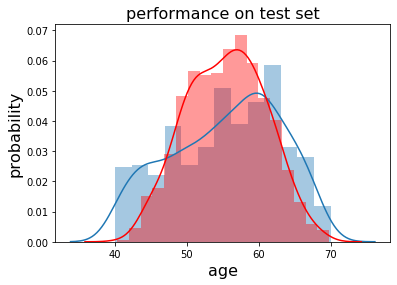

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.distplot(y_actual, kde=True, hist = True)
sb.distplot(y_predict, kde=True, hist = True, color = 'r')
plt.xlabel("age", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.title("performance on test set", fontsize=16)

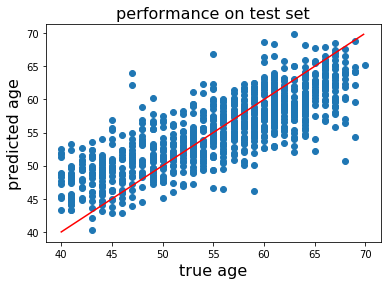

In [54]:
plt.scatter(y_actual, y_predict)
plt.xlabel("true age", fontsize=16)
plt.ylabel("predicted age", fontsize=16)
plt.title("performance on test set", fontsize=16)
lineStart = y_test.min()
lindEnd = y_predict.max()
plt.plot([lineStart,lindEnd], [lineStart,lindEnd], 'k-', color = 'r')

In [11]:
Gene_label = []
filename = "/Users/jilanxin/Documents/Biobank/apoe.txt"
with open(filename, "r") as myfile:
    for line in myfile:
        Gene_label.append(line.strip().split())
        
Gene_label_df = pd.DataFrame(Gene_label)

Gene_label_df.columns = Gene_label_df.iloc[0]
Gene_label_df.columns
APOE4e4 = Gene_label_df[Gene_label_df["apoe"].isin(['e4e4'])]
APOE2e2 = Gene_label_df[Gene_label_df["apoe"].isin(['e2e2'])]
APOE3e3 = Gene_label_df[Gene_label_df["apoe"].isin(['e3e3'])]

In [12]:
E4e4 = df_dropped[df_dropped.index.isin(APOE4e4['n_eid_14631'])]

y_e4 = E4e4['n_21003_0_0']
X_e4 = E4e4.drop(['n_21003_0_0'], axis=1)
#X_e4 = E4e4[feature_names[indices][235:335]]

y_pred_e4 = fitted_model.predict(X_e4.values) 
print(str(mean_absolute_error(y_e4,y_pred_e4)) + 
      ",MSE:" + str(mean_squared_error(y_e4,y_pred_e4))+
      ",correlation"+str(pearsonr(y_e4, y_pred_e4)))
print(np.mean(y_e4),np.std(y_e4),np.mean(y_pred_e4),np.std(y_pred_e4))

NameError: name 'fitted_model' is not defined

Text(0.5, 1.0, 'performance on E4e4 set')

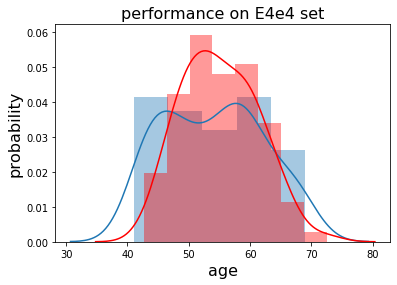

In [73]:
sb.distplot(y_e4, kde=True, hist = True)
sb.distplot(y_pred_e4, kde=True, hist = True, color = 'r')
plt.xlabel("age", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.title("performance on E4e4 set", fontsize=16)

In [57]:
E3e3 = df_dropped[df_dropped.index.isin(APOE3e3['n_eid_14631'])]

y_e3 = E3e3['n_21003_0_0']
X_e3 = E3e3.drop(['n_21003_0_0'], axis=1)
#X_e4 = E4e4[feature_names[indices][235:335]]

y_pred_e3 = fitted_model.predict(X_e3.values) 
print(str(mean_absolute_error(y_e3,y_pred_e3)) + 
      ",MSE:" + str(mean_squared_error(y_e3,y_pred_e3))+
      ",correlation"+str(pearsonr(y_e3, y_pred_e3)))
print(np.mean(y_e3),np.std(y_e3),np.mean(y_pred_e3),np.std(y_pred_e3))

3.156224380687762,MSE:15.449124550911355,correlation(0.8550963043014156, 0.0)
55.70670084218235 7.41815016046574 55.61974715067144 5.537494620512463


Text(0.5, 1.0, 'performance on E3e3 set')

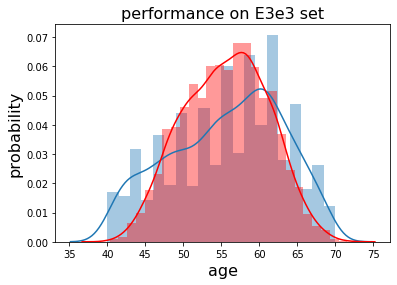

In [74]:
sb.distplot(y_e3, kde=True, hist = True)
sb.distplot(y_pred_e3, kde=True, hist = True, color = 'r')
plt.xlabel("age", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.title("performance on E3e3 set", fontsize=16)

In [58]:
E2e2 = df_dropped[df_dropped.index.isin(APOE2e2['n_eid_14631'])]

y_e2 = E2e2['n_21003_0_0']
X_e2 = E2e2.drop(['n_21003_0_0'], axis=1)
y_pred_e2 = fitted_model.predict(X_e2.values) 
print(str(mean_absolute_error(y_e2,y_pred_e2)) + 
      ",MSE:" + str(mean_squared_error(y_e2,y_pred_e2))+
      ",correlation"+str(pearsonr(y_e2, y_pred_e2)))
print(np.mean(y_e2),np.std(y_e2),np.mean(y_pred_e2),np.std(y_pred_e2))

3.257239545913542,MSE:15.750181800573145,correlation(0.8475355170670971, 1.2680098229441767e-08)
53.75 7.214197312046771 54.777688567615485 5.930118988826747


Text(0.5, 1.0, 'performance on E2e2 set')

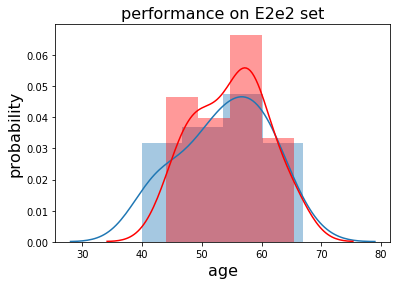

In [75]:
sb.distplot(y_e2, kde=True, hist = True)
sb.distplot(y_pred_e2, kde=True, hist = True, color = 'r')
plt.xlabel("age", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.title("performance on E2e2 set", fontsize=16)

In [59]:
healthy_label = pd.read_csv("/Users/jilanxin/Downloads/UKB/data_for_GWAS.csv")
healthy_label = healthy_label.set_index('n_eid_14631')
healthy_label = healthy_label.dropna(subset = ["disease_free_65"])
healthy_label.shape
healthy = healthy_label[healthy_label["disease_free_65"]==1]
disease = healthy_label[healthy_label["disease_free_65"]==0]

healthy_sub = df_dropped[df_dropped.index.isin(healthy.index)]
disease_sub = df_dropped[df_dropped.index.isin(disease.index)]

In [60]:
y_healthy = healthy_sub['n_21003_0_0']
X_healthy = healthy_sub.drop(['n_21003_0_0'], axis=1)
y_pred_healthy = fitted_model.predict(X_healthy.values) 
print(str(mean_absolute_error(y_healthy,y_pred_healthy)) + 
      ",MSE:" + str(mean_squared_error(y_healthy,y_pred_healthy))+
      ",correlation"+str(pearsonr(y_healthy, y_pred_healthy)))
print(np.mean(y_healthy),np.std(y_healthy),np.mean(y_pred_healthy),np.std(y_pred_healthy))

3.229610897095949,MSE:15.7892029424894,correlation(0.5607783697779348, 1.030081014463477e-131)
62.42857142857143 3.1600209407590576 60.00135166293103 3.519158058834126


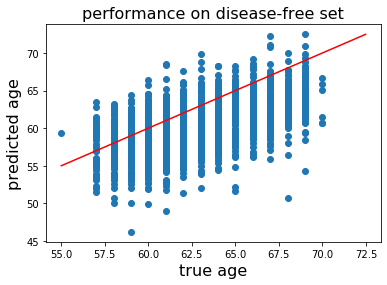

In [66]:
plt.scatter(y_healthy, y_pred_healthy)
plt.xlabel("true age", fontsize=16)
plt.ylabel("predicted age", fontsize=16)
plt.title("performance on disease-free set", fontsize=16)
lineStart = y_healthy.min()
lindEnd = y_pred_healthy.max()
plt.plot([lineStart,lindEnd], [lineStart,lindEnd], 'k-', color = 'r')

Text(0.5, 1.0, 'performance on disease-free set')

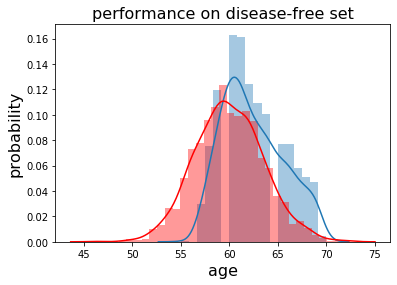

In [72]:
sb.distplot(y_healthy, kde=True, hist = True)
sb.distplot(y_pred_healthy, kde=True, hist = True, color = 'r')
plt.xlabel("age", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.title("performance on disease-free set", fontsize=16)

In [61]:
y_disease = disease_sub['n_21003_0_0']
X_disease = disease_sub.drop(['n_21003_0_0'], axis=1)
y_pred_disease = fitted_model.predict(X_disease.values) 
print(str(mean_absolute_error(y_disease,y_pred_disease)) + 
      ",MSE:" + str(mean_squared_error(y_disease,y_pred_disease))+
      ",correlation"+str(pearsonr(y_disease, y_pred_disease)))
print(np.mean(y_disease),np.std(y_disease),np.mean(y_pred_disease),np.std(y_pred_disease))

3.0141423744700178,MSE:14.106478405212343,correlation(0.8228581459693445, 1.2975728480215499e-195)
57.37848101265823 6.5857377716148795 57.12182132540878 5.230421329889045


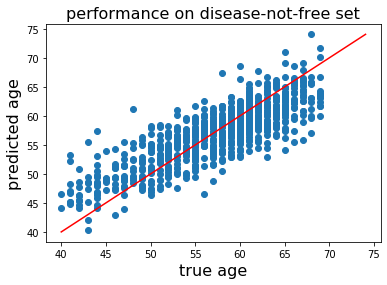

In [67]:
plt.scatter(y_disease, y_pred_disease)
plt.xlabel("true age", fontsize=16)
plt.ylabel("predicted age", fontsize=16)
plt.title("performance on disease-not-free set", fontsize=16)
lineStart = y_disease.min()
lindEnd = y_pred_disease.max()
plt.plot([lineStart,lindEnd], [lineStart,lindEnd], 'k-', color = 'r')

Text(0.5, 1.0, 'performance on disease-not-free set')

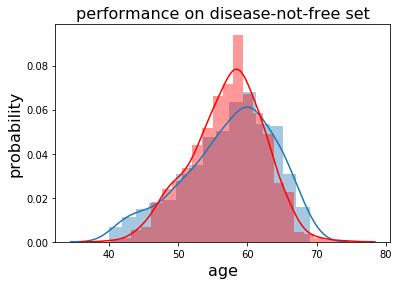

In [68]:
sb.distplot(y_disease, kde=True, hist = True)
sb.distplot(y_pred_disease, kde=True, hist = True, color = 'r')
plt.xlabel("age", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.title("performance on disease-not-free set", fontsize=16)

## Correlation to ipaq in healthy subjects

In [24]:
data = pd.read_pickle("/Users/jilanxin/Documents/Biobank/my_Azure_ML/UKB_data_with_BrainAge")

In [25]:
old_data_mat = pd.read_csv('/Users/jilanxin/Documents/Biobank/final_cleandata3.csv')

In [26]:
ipaq = old_data_mat[['n_eid_14631','total_MET_min_per_wk_0_0']]
ipaq = ipaq.set_index('n_eid_14631')
ipaq = ipaq.dropna()
ipaq.shape

(986, 1)

In [28]:
from scipy import stats
#df_healthy = df_dropped[df_dropped.index.isin(healthy.index)]
df_ipaq = pd.merge(df_dropped, ipaq, left_index=True, right_index=True)
df_ipaq.shape
df_ipaq['brain_age']
#print(stats.pearsonr(df_ipaq['total_MET_min_per_wk_0_0'],df_ipaq['brain_age']))
#plt.scatter(df_ipaq['brain_age'],df_ipaq['total_MET_min_per_wk_0_0'])
#plt.scatter(df_ipaq['n_21003_0_0'],df_ipaq['total_MET_min_per_wk_0_0'])
#plt.ylabel("ipaq", fontsize=16)
#plt.xlabel("brain age", fontsize=16)

KeyError: 'brain_age'

In [95]:
iq = old_data_mat[['n_eid_14631','Fluid_intelligence_1']]
iq = iq.set_index('n_eid_14631')
iq = iq.dropna()
iq.shape

(1940, 1)

(-0.140179545459981, 0.001281125440137023)


Text(0.5, 0, 'brain age')

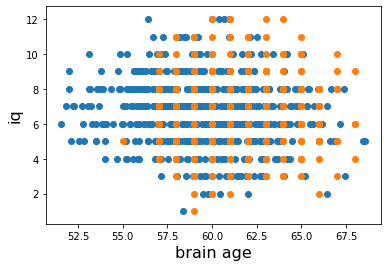

In [99]:
df_iq = pd.merge(df_healthy, iq, left_index=True, right_index=True)
df_iq.shape
print(stats.pearsonr(df_iq['Fluid_intelligence_1'],df_iq['brain_age']))
plt.scatter(df_iq['brain_age'],df_iq['Fluid_intelligence_1'])
plt.scatter(df_iq['n_21003_0_0'],df_iq['Fluid_intelligence_1'])
plt.ylabel("iq", fontsize=16)
plt.xlabel("brain age", fontsize=16)

In [105]:
task_mem = old_data_mat[['n_eid_14631','Task_duration_1_mean']]
task_mem = task_mem.set_index('n_eid_14631')
task_mem = task_mem.dropna()
task_mem.shape

(1947, 1)

(0.08046532738447867, 0.06492002824284425)


Text(0.5, 0, 'brain age')

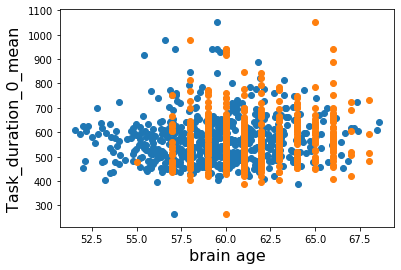

In [106]:
task_mem = pd.merge(df_healthy, task_mem, left_index=True, right_index=True)
task_mem.shape
print(stats.pearsonr(task_mem['Task_duration_1_mean'],task_mem['brain_age']))
plt.scatter(task_mem['brain_age'],task_mem['Task_duration_1_mean'])
plt.scatter(task_mem['n_21003_0_0'],task_mem['Task_duration_1_mean'])
plt.ylabel("Task_duration_0_mean", fontsize=16)
plt.xlabel("brain age", fontsize=16)